In [62]:
import pandas as pd
from gensim.models.word2vec import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import re, string
from matplotlib.pyplot import *
df = pd.read_csv("stock_data.csv")
split = 0.7
df_train = df[:int(split*len(df))]
df_test = df[int((1-split)*len(df)):]

In [63]:
import re, string
stop_words = set(['all', "she'll", "don't", 'being', 'over', 'through', 
'yourselves', 'its', 'before', "he's", "when's", "we've", 'had', 'should',
"he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', 
"haven't", 'do', 'them', 'his', "they'll", 'very', "who's", "they'd", 
'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', 
"we'll", 'did', "they've", 'this', 'she', 'each', "won't", 'where', 
"mustn't", "isn't", "i'll", "why's", 'because', "you'd", 'doing', 'some', 
'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'while', 
"wasn't", 'does', "shouldn't", 'above', 'between', 'be', 'we', 'who', 
"you're", 'were', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 
'of', 'could', 'against', "i'd", "weren't", "i'm", 'or', "can't", 'own', 
'into', 'whom', 'down', "hadn't", "couldn't", 'your', "doesn't", 'from', 
"how's", 'her', 'their', "it's", 'there', 'been', 'why', 'few', 'too', 
'themselves', 'was', 'until', 'more', 'himself', "where's", "i've", 'with', 
"didn't", "what's", 'but', 'herself', 'than', "here's", 'he', 'me', 
"they're", 'myself', 'these', "hasn't", 'below', 'ought', 'theirs', 'my', 
"wouldn't", "we'd", 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 
'at', 'have', 'in', 'any', 'if', 'again', 'no', 'that', 'when', 'same', 
'how', 'other', 'which', 'you', "shan't", 'our', 'after', "let's", 'most', 
'such', 'on', "he'll", 'a', 'off', 'i', "she'd", 'yours', "you'll", 'so', 
"we're", "she's", 'the', "that's", 'having', 'once'])
def tokenize(docs):
  pattern = re.compile('[\W_]+', re.UNICODE)
  sentences = []
  for d in docs:
    sentence = d.lower().split(" ")
    sentence = [pattern.sub('', w) for w in sentence]
    sentences.append( [w for w in sentence if w not in stop_words] )
  return sentences

In [64]:
sentences = tokenize(df_train.Text)
model = Word2Vec(sentences, size=300, window=10, min_count=1,
   sample=1e-3, workers=2)
model.init_sims(replace=True)

In [65]:
def featurize_w2v(model, sentences):
  f = np.zeros((len(sentences), model.vector_size))
  for i,s in enumerate(sentences):
    for w in s:
      try:
        vec = model[w]
      except KeyError:
        continue
      f[i,:] = f[i,:] + vec
    f[i,:] = f[i,:] / len(s)
  return f

<ipython-input-65-23269ea32f13>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = model[w]
<ipython-input-65-23269ea32f13>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = model[w]


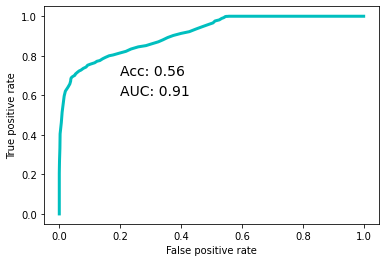

In [66]:
features_w2v = featurize_w2v(model, sentences)

model4 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model4.fit(features_w2v, df_train.Sentiment)

test_sentences = tokenize(df_test.Text)
test_features_w2v = featurize_w2v(model, test_sentences)
pred4 = model4.predict_proba(test_features_w2v)
performance(df_test.Sentiment, pred4, color="c")